# 0.5 - Context

In [31]:
# Import to be able to import python package from src
import sys
sys.path.insert(0, '../../src')

In [32]:
import pandas as pd
import numpy as np
from darts.datasets import AirPassengersDataset, AusBeerDataset, AustralianTourismDataset
import ontime as on

## Load test data

In [33]:
s1 = AirPassengersDataset().load()
s2 = AusBeerDataset().load()

In [34]:
train = s2[:200]
test = s2[200:]

## Common Context

### Generic Predictor

In [35]:
gp = on.context.common.GenericPredictor()
gp.fit(train);

In [36]:
pred = gp.predict(len(test))

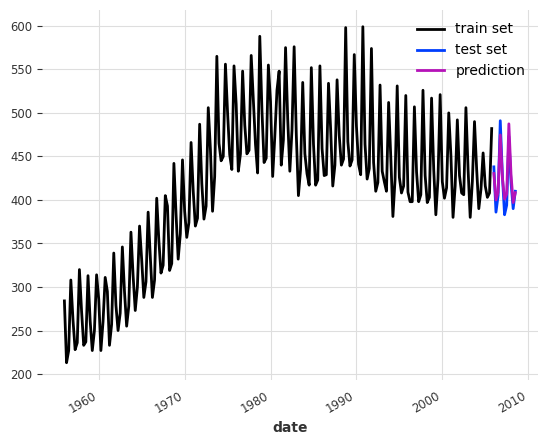

In [37]:
train.plot(label='train set')
test.plot(label='test set')
pred.plot(label='prediction');